task 7

Linear Kernel SVM Performance:
Accuracy: 0.9006
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.91      0.81      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171


RBF Kernel SVM Performance:
Accuracy: 0.9064
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       108
           1       0.91      0.83      0.87        63

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



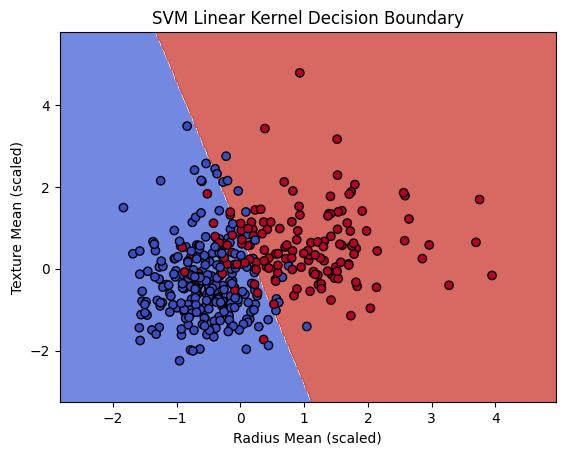

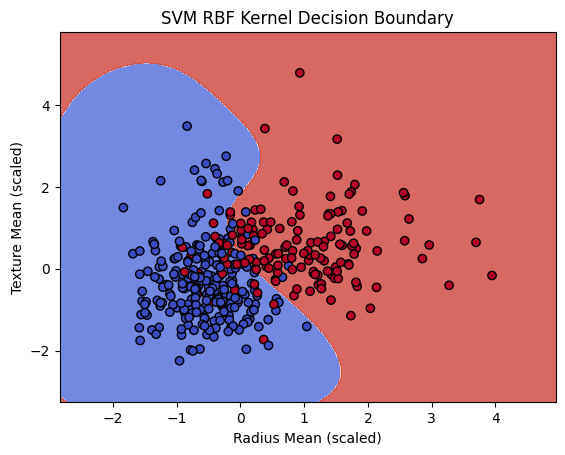


Best Parameters from GridSearchCV:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy with Best Model: 0.9064
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.90      0.84      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171


5-Fold Cross-Validation Scores:
Scores: [0.9        0.9        0.975      0.84810127 0.88607595]
Mean Accuracy: 0.9018 (+/- 0.0824)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and prepare the dataset for binary classification
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Prepare data: Drop 'id' column and map diagnosis (M=1, B=0)
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features (using only 2 features for visualization: radius_mean and texture_mean)
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train SVM with linear and RBF kernel
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Evaluate initial performance
print("Linear Kernel SVM Performance:")
y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(classification_report(y_test, y_pred_linear))

print("\nRBF Kernel SVM Performance:")
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(classification_report(y_test, y_pred_rbf))

# Step 3: Visualize decision boundary using 2D data
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Radius Mean (scaled)')
    plt.ylabel('Texture Mean (scaled)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for both kernels
plot_decision_boundary(svm_linear, X_train_scaled, y_train, 'SVM Linear Kernel Decision Boundary')
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, 'SVM RBF Kernel Decision Boundary')

# Step 4: Tune hyperparameters C and gamma
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and performance
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(f"Accuracy with Best Model: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

# Step 5: Use cross-validation to evaluate the performance
# Perform 5-fold cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n5-Fold Cross-Validation Scores:")
print(f"Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")